# Name: Pavan Deore                     

# Course: DANLC

# Batch: ANP-C8220

# Trainer: Rajshri Thete 

# Project Title: SuperStore Sales Insight-Analysis

# Purpose:

# The primary goal of this project is to analyze the sales data of a superstore to gain insights into its operations, identify trends, and provide actionable recommendations. This will be achieved through comprehensive data analysis and visualization using Python. The project aims to uncover patterns in sales, profits, and customer demographics, which will help in making informed business decisions.

# Connection with database

In [2]:
import mysql.connector
import pandas as pd

conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='rootmysql',
    database='Pro'
)

query = "SELECT * FROM Sales"
df = pd.read_sql(query, conn)


C:\Users\PAVAN\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\PAVAN\AppData\Local\Temp\ipykernel_17384\618800831.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


# Data cleaning and EDA

In [13]:
#  Convert Data Types: Ensure data types are correct
df['Sales'] = df['Sales'].astype(float)
df['Quantity'] = df['Quantity'].astype(int)

In [8]:
print(df.describe())  # Describe the data

         SalesID  ShipModeID  SegmentID   RegionID  SubCategoryID       Sales  \
count  20.000000   20.000000  20.000000  20.000000      20.000000   20.000000   
mean   15.500000    1.700000   1.100000   1.600000       4.500000  308.516000   
std    10.674613    0.470162   0.307794   0.502625       2.115109  385.133918   
min     1.000000    1.000000   1.000000   1.000000       1.000000    7.280000   
25%     5.750000    1.000000   1.000000   1.000000       3.000000   18.500000   
50%    15.500000    2.000000   1.000000   2.000000       4.500000   81.880000   
75%    25.250000    2.000000   1.000000   2.000000       6.000000  731.940000   
max    30.000000    2.000000   2.000000   2.000000       8.000000  957.580000   

        Quantity   Discount      Profit  
count  20.000000  20.000000   20.000000  
mean    3.900000   0.105000    3.496000  
std     1.744163   0.149473  147.352606  
min     2.000000   0.000000 -383.030000  
25%     2.000000   0.000000    2.520000  
50%     3.500000  

In [36]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 SalesID          0
ShipModeID       0
SegmentID        0
RegionID         0
SubCategoryID    0
Country          0
City             0
State            0
PostalCode       0
Sales            0
Quantity         0
Discount         0
Profit           0
ProfitMargin     0
dtype: int64


In [39]:
# Fill missing values (if any)
df.fillna(0, inplace=True)

In [40]:
# Check for duplicates
duplicates = df[df.duplicated()]
print(f"Number of duplicates: {len(duplicates)}")

Number of duplicates: 0


In [41]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [42]:
# Display the cleaned data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SalesID        20 non-null     int64  
 1   ShipModeID     20 non-null     int64  
 2   SegmentID      20 non-null     int64  
 3   RegionID       20 non-null     int64  
 4   SubCategoryID  20 non-null     int64  
 5   Country        20 non-null     object 
 6   City           20 non-null     object 
 7   State          20 non-null     object 
 8   PostalCode     20 non-null     object 
 9   Sales          20 non-null     float64
 10  Quantity       20 non-null     int64  
 11  Discount       20 non-null     float64
 12  Profit         20 non-null     float64
 13  ProfitMargin   20 non-null     float64
dtypes: float64(4), int64(6), object(4)
memory usage: 2.3+ KB


In [4]:
df.head()    # First few columns

,SalesID,ShipModeID,SegmentID,RegionID,SubCategoryID,Country,City,State,PostalCode,Sales,Quantity,Discount,Profit
0,1,1,1,1,1,United States,Henderson,Kentucky,42420,261.96,2,0.00,41.91
1,2,1,1,1,2,United States,Henderson,Kentucky,42420,731.94,3,0.00,219.58
2,3,1,2,2,4,United States,Los Angeles,California,90036,14.62,2,0.00,6.87
3,4,2,1,1,3,United States,Fort Lauderdale,Florida,33311,957.58,5,0.45,-383.03
4,5,2,1,1,5,United States,Fort Lauderdale,Florida,33311,22.37,2,0.20,2.52


Number of Rows and columns

In [9]:
rows, columns = df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 20
Number of columns: 13


# Data visualization:

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


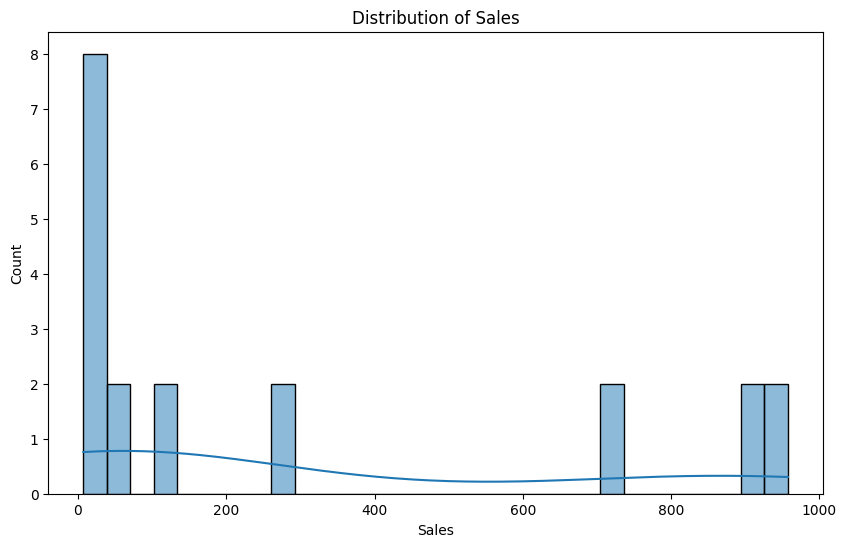

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of Sales
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], bins=30, kde=True)
plt.title('Distribution of Sales')
plt.show()

Insights:
The histogram of sales distribution provides a visual representation of how sales values are spread across different ranges. The plot shows that most sales transactions fall within a lower range, with a few high-value transactions creating a right-skewed distribution

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

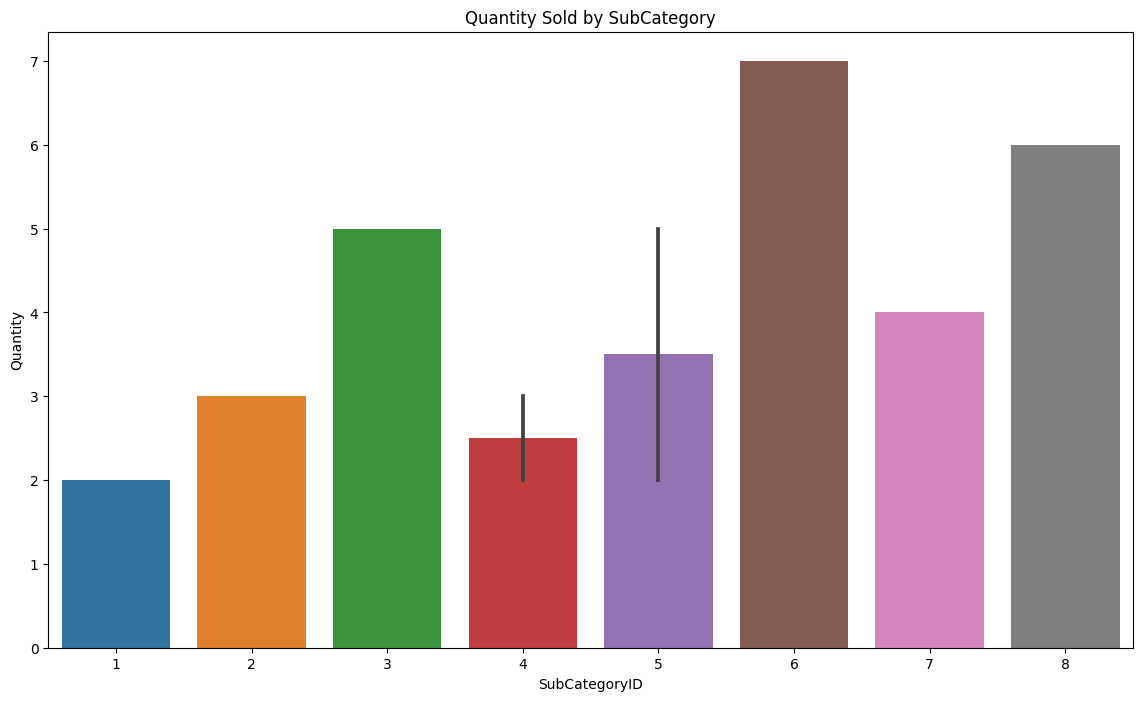

In [24]:
#Quantity Sold by SubCategory
plt.figure(figsize=(14, 8))
sns.barplot(x='SubCategoryID', y='Quantity', data=df)
plt.title('Quantity Sold by SubCategory')
plt.show()

Insights:
The bar plot of quantity sold by subcategory provides insights into which subcategories have the highest sales volumes. Subcategories with higher quantities sold indicate strong customer demand and popularity. This information is crucial for inventory management, ensuring that high-demand items are adequately stocked.

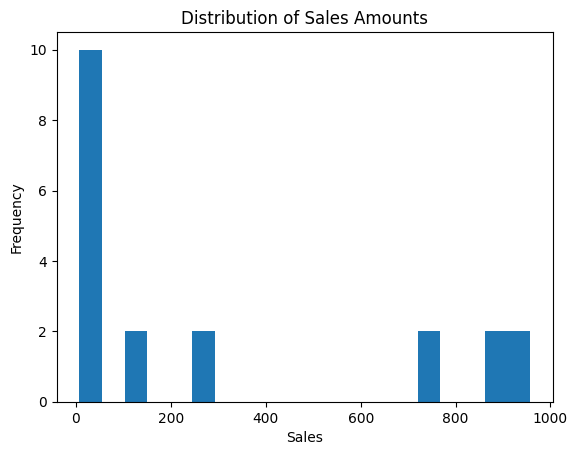

In [25]:
# Distribution of Sales Amount
df['Sales'].plot.hist(bins=20)
plt.title('Distribution of Sales Amounts')
plt.xlabel('Sales')
plt.show()

Insights:
The histogram of sales amounts provides a visual representation of the frequency distribution of sales values. By plotting the sales data into 20 bins, it shows how sales are spread across different ranges. This visualization helps identify common sales amounts and detect any skewness in the data, which can be useful for understanding overall sales performance and informing pricing strategies.

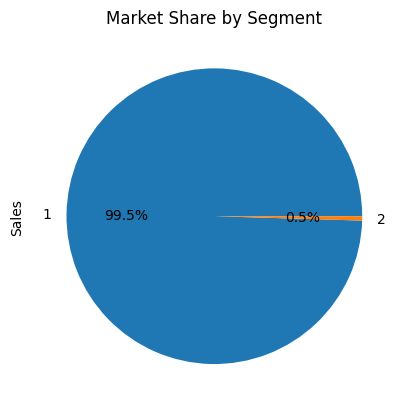

In [26]:
# Market share by segment
segment_sales = df.groupby('SegmentID')['Sales'].sum()
segment_sales.plot.pie(autopct='%1.1f%%')
plt.title('Market Share by Segment')
plt.show()

Insights: The chart shows the relative contribution of each segment to the total sales.
Segments with larger pie slices indicate they have a higher share of the market, meaning they generate more sales compared to other segments.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


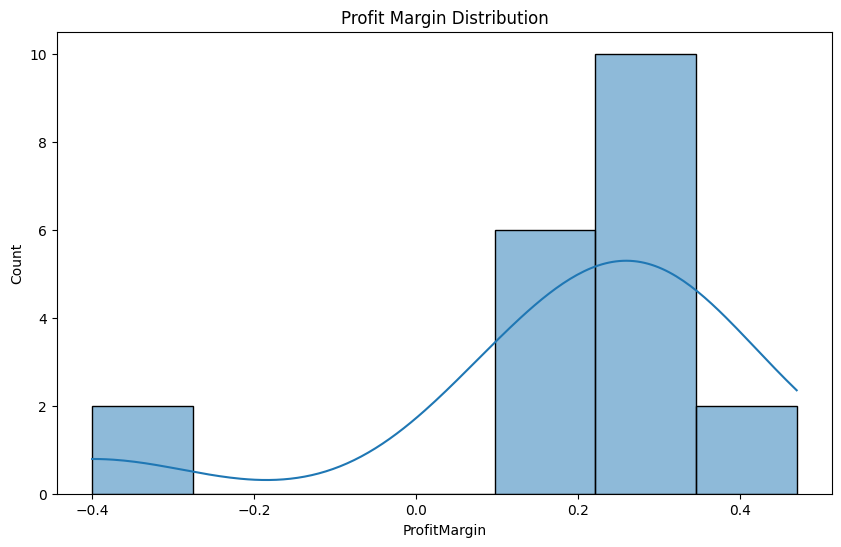

In [28]:
#  Profit Margin over Sales
df['ProfitMargin'] = df['Profit'] / df['Sales']
plt.figure(figsize=(10, 6))
sns.histplot(df['ProfitMargin'], kde=True)
plt.title('Profit Margin Distribution')
plt.show()

Insights: The histogram displays how profit margins are distributed, showing the frequency of different profit margin percentages across sales.
A KDE curve smooths out the histogram to give an overall trend of the distribution.

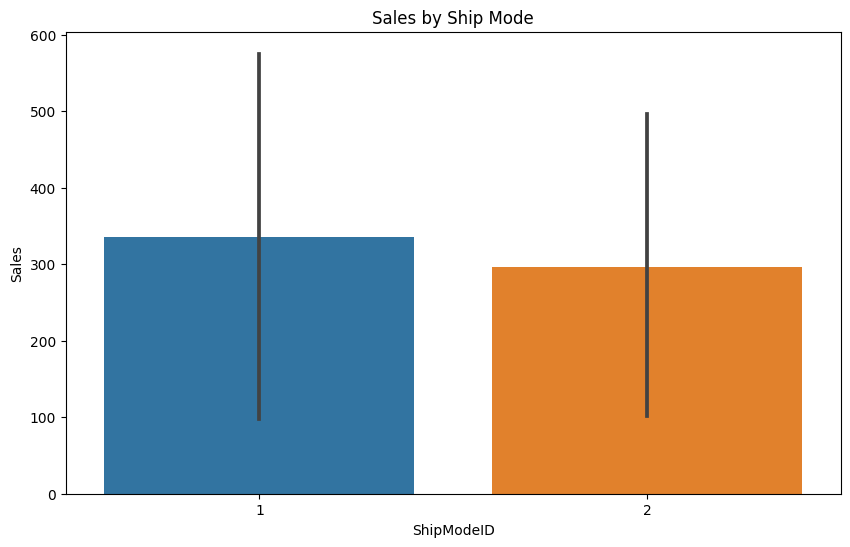

In [29]:
#  Sales by Ship Mode
plt.figure(figsize=(10, 6))
sns.barplot(x='ShipModeID', y='Sales', data=df)
plt.title('Sales by Ship Mode')
plt.show()

Insights:
The bar plot shows the total sales for each shipping mode. By comparing the heights of the bars, you can identify which shipping mode generates the highest and lowest sales.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


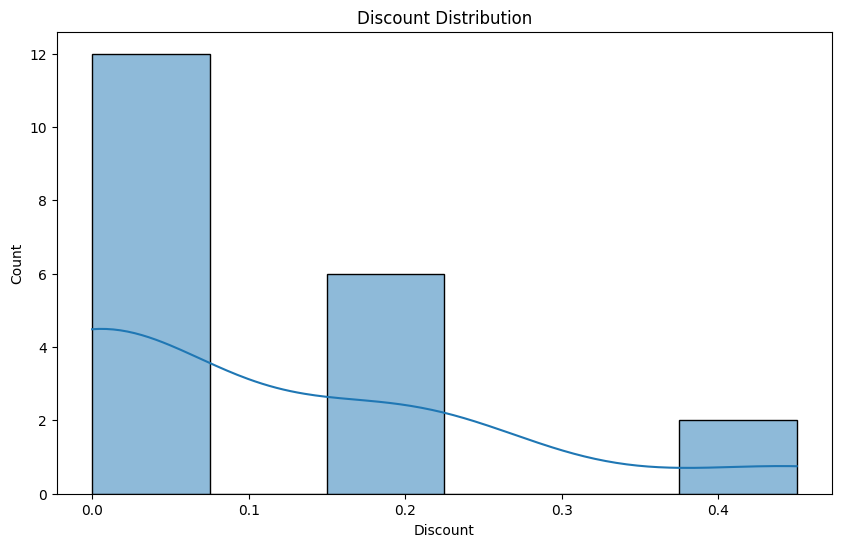

In [30]:
#  Distribution of Discounts
plt.figure(figsize=(10, 6))
sns.histplot(df['Discount'], kde=True)
plt.title('Discount Distribution')
plt.show()

Insights: Peaks in the distribution indicate the most common discount rates. For instance, if the histogram shows a peak at 0.2 (20%), it means that 20% is the most frequently applied discount in the dataset.
If there are peaks at multiple values (e.g., 0%, 10%, and 20%), it suggests that the company regularly applies specific discount rates.

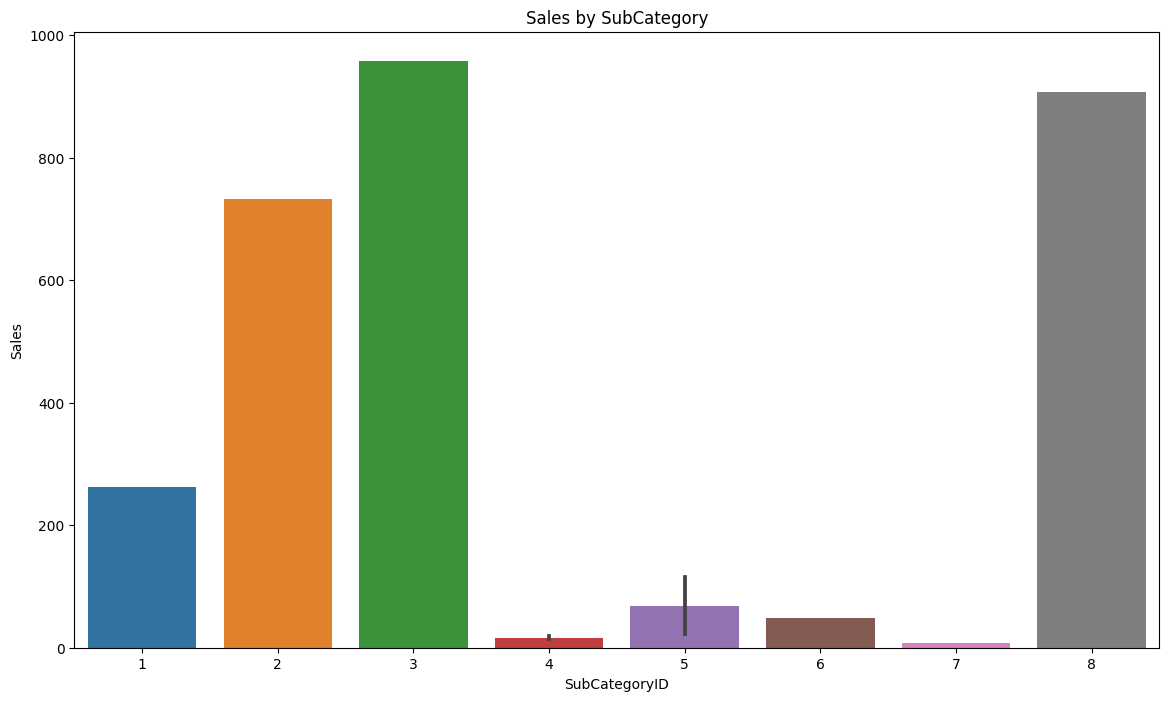

In [34]:
# Sales by Sub-Category
plt.figure(figsize=(14, 8))
sns.barplot(x='SubCategoryID', y='Sales', data=df)
plt.title('Sales by SubCategory')
plt.show()

Insights: The height of each bar represents the total sales for a particular sub-category. Identify which sub-categories have the highest sales. These are the areas where the company is generating the most revenue.

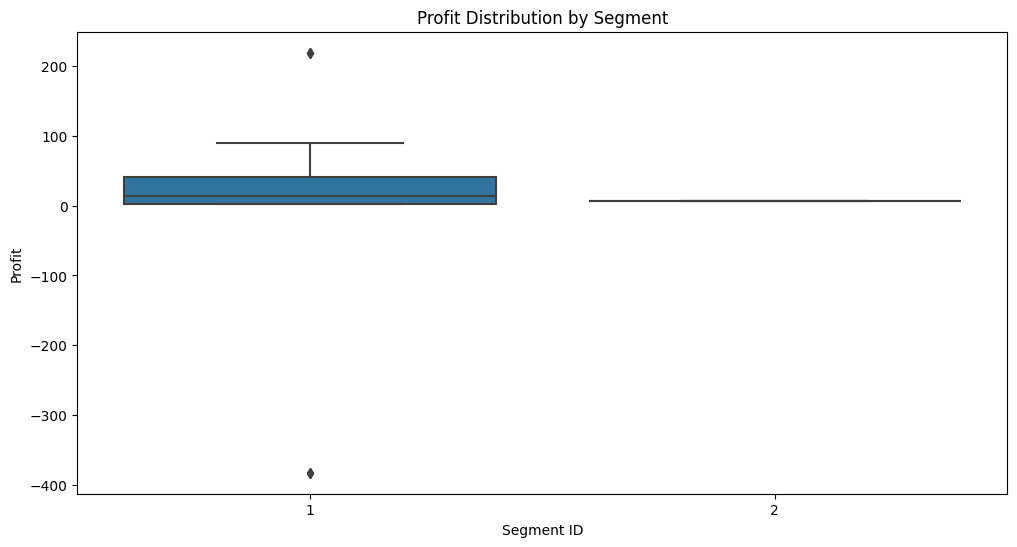

In [16]:
# Visualization : Profit Distribution by Segment
plt.figure(figsize=(12, 6))
sns.boxplot(x='SegmentID', y='Profit', data=df)
plt.title('Profit Distribution by Segment')
plt.xlabel('Segment ID')
plt.ylabel('Profit')
plt.show()

Insights: The box plot shows the spread of profit within each segment.
The box represents the interquartile range (IQR), with the line inside the box indicating the median profit for that segment.
Whiskers extend to show the range of profit values, while any outliers are marked as individual points outside the whiskers.

C:\Users\PAVAN\AppData\Local\Temp\ipykernel_2724\1470456890.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='State', y='Profit', data=df, estimator=sum, ci=None)


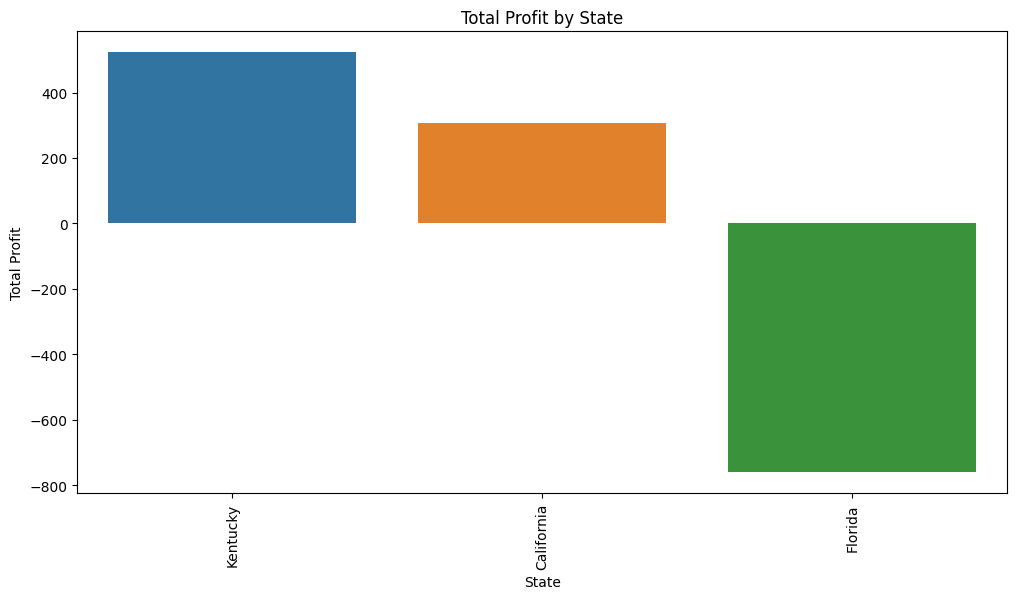

In [17]:
# Visualization : Profit by State
plt.figure(figsize=(12, 6))
sns.barplot(x='State', y='Profit', data=df, estimator=sum, ci=None)
plt.title('Total Profit by State')
plt.xlabel('State')
plt.ylabel('Total Profit')
plt.xticks(rotation=90)
plt.show()

Insights: Each bar represents the total profit generated by a state, with higher bars indicating states that contribute more to the company's overall profitability.
The plot shows which states are the most profitable and which states might be generating lower or negative profits.

C:\Users\PAVAN\AppData\Local\Temp\ipykernel_2724\541504643.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='City', y='Sales', data=df, estimator=sum, ci=None)


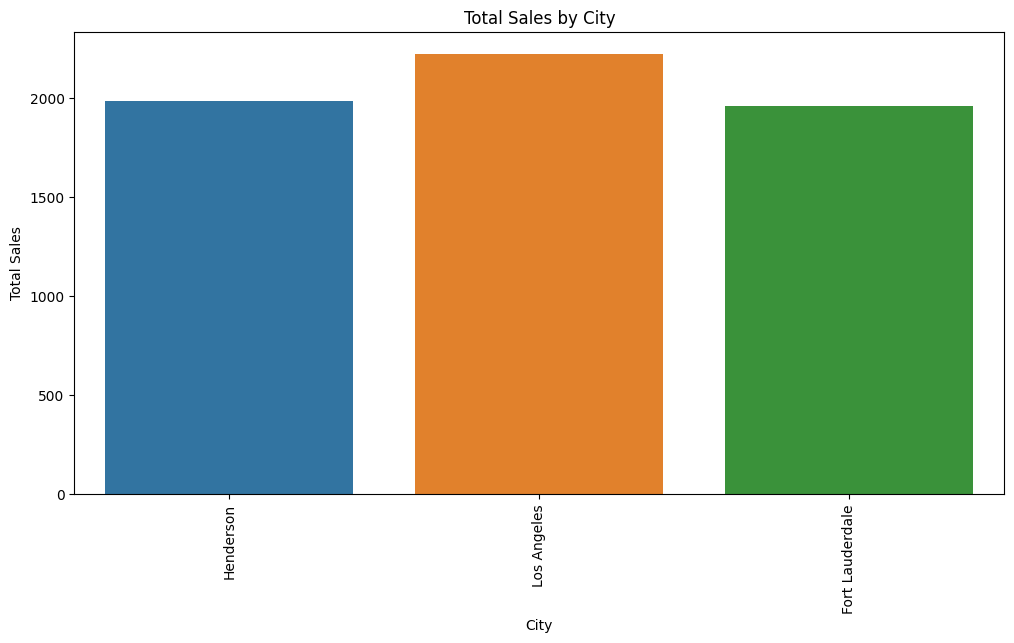

In [18]:
# Visualization: Sales by City
plt.figure(figsize=(12, 6))
sns.barplot(x='City', y='Sales', data=df, estimator=sum, ci=None)
plt.title('Total Sales by City')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()

Insights: Each bar represents the total sales for a specific city. Taller bars indicate higher sales, while shorter bars show cities with lower sales.
This plot helps identify which cities are the major contributors to overall sales and which cities are underperforming.

# Conclusion:


This project successfully demonstrated the power of combining SQL for data extraction and Python for data analysis and visualization. The insights gained from the visualizations can drive strategic decisions in marketing, sales, inventory management, and customer relationship management. By understanding the data at a granular level, businesses can optimize their operations, improve profitability, and enhance customer satisfaction.

Key Achievements:

Data Integration: Seamlessly integrated data from a MySQL database into a Python environment, showcasing the effective use of SQL for data extraction and Python for data manipulation and analysis.
Comprehensive Data Cleaning: Implemented robust data cleaning techniques to handle missing values, remove duplicates, and ensure data type consistency, resulting in a high-quality dataset ready for analysis.

Diverse Data Visualizations: Created a variety of visualizations using matplotlib, seaborn, pandas, and numpy, each tailored to highlight different aspects of the data.

Product Performance: Identifying high and low-performing subcategories and products.

Discount Impact: Analyzing the distribution and impact of discounts on sales and profits.

Operational Efficiency: Identifying areas for improvement in logistics and operations based on shipping mode preferences.

# Future Work

Predictive Analytics: Implement machine learning models to predict future sales trends, customer behavior, and inventory needs, enabling proactive decision-making.

Interactive Dashboards: Develop interactive dashboards using tools like Tableau or Power BI to provide real-time insights and facilitate data-driven decision-making across the organization.

Advanced Customer Segmentation: Perform deeper customer segmentation analysis to uncover more granular insights and tailor marketing strategies even further.

Optimization Strategies: Explore optimization techniques for pricing, discounting, and inventory management to maximize profitability and operational efficiency.